<a href="https://colab.research.google.com/github/charlescanero/charlescanero.github.io/blob/main/project_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ESG and Financial Data Analysis: Analyzing the Effects of a Company's Risk Score on their Performance.

##Introduction

Environmental, Social, and Governance (ESG) criteria are increasingly being used by investors to screen potential investments and assess a company's sustainability and ethical impact. Coupled with financial and accounting data, these metrics provide a comprehensive view of a company's performance and risk.

##Objective:

Hypothesis: Higher ESG risk ratings (indicating greater unmanaged risks in environmental, social, and governance areas) are associated with poorer financial health and lower profitability.

Objective: To analyze the financial performance of companies with different levels of ESG risk ratings and identify any significant correlations.

##Data Collection

The data for this project was collected using Python. Financial and accounting data were retrieved using the yfinance library, and ESG data was collected using Selenium to scrape Yahoo! Finance's Sustainability section.

##Descriptive Statistics

First, let's load the collected data and calculate the descriptive statistics.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bals = pd.read_csv("balance_sheets.csv")
incomes = pd.read_csv("income_statements.csv")
hists = pd.read_csv("history.csv")
esg_results_df = pd.read_csv("esg_ratings.csv")

Balance Sheet data extracted from the last year.

In [ ]:
bals.describe()

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,Total Capitalization,...,Trading Securities,Investmentsin Subsidiariesat Cost,Total Partnership Capital,Limited Partnership Capital,Dueto Related Parties Non Current,Duefrom Related Parties Non Current,Fixed Assets Revaluation Reserve,Current Deferred Taxes Liabilities,Current Deferred Taxes Assets,General Partnership Capital
count,3.089000e+03,3.089000e+03,2.674000e+03,3.060000e+03,3.093000e+03,3.090000e+03,2.699000e+03,3.093000e+03,3.093000e+03,3.091000e+03,...,1.220000e+02,3.600000e+01,1.000000e+01,1.000000e+01,1.800000e+01,2.200000e+01,3.000000e+00,3.000000e+00,5.000000e+00,5.0
mean,6.286376e+08,7.349344e+08,1.397200e+10,2.010570e+10,6.313827e+09,3.538533e+10,2.206797e+09,6.666156e+09,1.658740e+10,3.307422e+10,...,8.811779e+10,2.777855e+09,1.964380e+10,1.963130e+10,7.742222e+08,8.024382e+07,3.001667e+09,2.325667e+08,3.234000e+08,-2000000.0
std,1.260834e+09,1.392953e+09,2.883267e+10,4.713261e+10,2.860947e+10,7.120085e+10,9.465743e+09,2.982931e+10,3.228088e+10,6.461270e+10,...,1.284742e+11,3.849279e+09,1.568801e+10,1.567458e+10,8.372440e+08,1.173026e+08,5.158336e+09,2.419972e+08,6.618761e+07,0.0
min,3.167625e+06,9.589239e+06,1.970800e+07,1.404000e+06,-9.834700e+10,1.221960e+08,-4.443000e+10,-9.834700e+10,-1.723300e+10,8.600000e+07,...,0.000000e+00,0.000000e+00,4.479000e+09,4.479000e+09,5.000000e+06,0.000000e+00,2.300000e+07,9.220000e+07,2.550000e+08,-2000000.0
25%,1.375061e+08,1.672020e+08,2.021972e+09,3.144718e+09,-1.799000e+09,6.635704e+09,-1.637970e+08,-1.804800e+09,3.012000e+09,6.462800e+09,...,1.220000e+08,4.755000e+08,4.826250e+09,4.826250e+09,1.400000e+08,5.500000e+03,2.350000e+07,9.285000e+07,2.820000e+08,-2000000.0
50%,2.698400e+08,3.043000e+08,5.418138e+09,6.889150e+09,2.021728e+09,1.370750e+10,9.370000e+08,1.992000e+09,6.960000e+09,1.332460e+10,...,6.486182e+09,1.388500e+09,1.910150e+10,1.908800e+10,3.050000e+08,3.529500e+06,2.400000e+07,9.350000e+07,3.100000e+08,-2000000.0
75%,5.949060e+08,6.834949e+08,1.292294e+10,1.717935e+10,8.241000e+09,3.242520e+10,2.615550e+09,8.522000e+09,1.697300e+10,3.124930e+10,...,1.358348e+11,1.962875e+09,3.345025e+10,3.343100e+10,1.529250e+09,1.440000e+08,4.491000e+09,3.027500e+08,3.440000e+08,-2000000.0
max,1.572341e+10,1.572341e+10,3.133490e+11,4.485490e+11,2.636610e+11,7.488770e+11,1.538040e+11,2.722630e+11,3.067370e+11,7.325090e+11,...,5.742130e+11,1.228100e+10,3.668200e+10,3.665600e+10,2.376000e+09,4.420000e+08,8.958000e+09,5.120000e+08,4.260000e+08,-2000000.0


Historical Financial Data extracted from the last 3 months.

In [ ]:
hists.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,197796.000000,197796.000000,197796.000000,197796.000000,1.977960e+05,197796.000000,197796.000000
mean,149.309518,150.892275,147.824738,149.415751,4.134482e+06,0.008568,0.000139
std,329.718700,333.286090,326.686469,330.093311,9.289442e+06,0.132398,0.016646
min,1.030000,1.060000,0.780000,0.980000,0.000000e+00,0.000000,0.000000
25%,39.985984,40.450001,39.532875,40.010676,8.323000e+05,0.000000,0.000000
50%,82.056905,82.941236,81.169998,82.105110,1.707600e+06,0.000000,0.000000
75%,154.942161,156.519590,153.534923,155.069881,3.854425e+06,0.000000,0.000000
max,8022.919922,8158.990234,8010.000000,8099.959961,3.160112e+08,35.000000,4.000000


Income Statement Data extracted from the last year.

In [ ]:
incomes.describe()

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Salaries And Wages,Total Other Finance Cost,Other Taxes,Provision For Doubtful Accounts,Depreciation Income Statement,Insurance And Claims,Rent And Landing Fees,Excise Taxes,Depletion Income Statement,Securities Amortization
count,3.088000e+03,3088.000000,2.698000e+03,3.088000e+03,2.973000e+03,2.666000e+03,2.698000e+03,2.862000e+03,3.022000e+03,2.858000e+03,...,6.680000e+02,3.360000e+02,2.320000e+02,7.600000e+01,2.300000e+02,1.080000e+02,7.900000e+01,3.100000e+01,8.000000e+00,5.000000e+00
mean,-1.212852e+07,0.204471,1.416967e+09,7.290419e+08,3.838623e+08,4.538722e+09,1.365855e+09,9.665740e+08,1.393013e+08,4.716878e+08,...,8.581200e+08,2.822005e+07,3.352277e+08,9.453408e+06,2.126490e+08,1.563685e+08,6.309244e+07,2.004000e+08,2.342250e+08,2.670120e+07
std,1.415244e+08,0.079883,3.080309e+09,2.063989e+09,8.135872e+08,1.146675e+10,3.085259e+09,2.453397e+09,1.522872e+09,2.059544e+09,...,1.985867e+09,9.812475e+07,1.026078e+09,2.172056e+07,3.579888e+08,2.901099e+08,5.935427e+07,2.600339e+09,1.093543e+08,2.412841e+07
min,-5.202400e+09,0.000000,-8.430000e+09,-1.191100e+10,-4.460000e+08,-7.980000e+08,-1.236200e+10,-1.297600e+10,-4.128000e+09,-9.500000e+07,...,-4.000000e+08,-1.250000e+08,-4.500000e+07,-2.300000e+07,3.370000e+05,5.050000e+05,4.500000e+06,-4.122000e+09,1.214000e+08,4.581000e+06
25%,-3.079825e+06,0.168618,2.714000e+08,1.090000e+08,6.000000e+07,5.609772e+08,2.593250e+08,1.754790e+08,-1.163772e+08,2.853525e+07,...,2.186500e+06,9.895000e+05,5.676600e+07,0.000000e+00,2.686750e+07,1.093850e+07,2.700000e+07,1.400000e+07,1.631000e+08,1.011000e+07
50%,0.000000e+00,0.210000,5.459560e+08,2.714000e+08,1.476340e+08,1.473500e+09,5.351335e+08,3.929600e+08,-4.199150e+07,7.415400e+07,...,5.390000e+07,3.950000e+06,1.230000e+08,2.816500e+06,1.030000e+08,2.868200e+07,3.492200e+07,4.529000e+08,1.830000e+08,1.320700e+07
75%,0.000000e+00,0.241000,1.313150e+09,7.237500e+08,3.720000e+08,3.343041e+09,1.288775e+09,9.650000e+08,-8.692000e+06,1.953368e+08,...,6.565000e+08,1.930000e+07,2.487338e+08,1.100000e+07,2.577500e+08,9.869550e+07,6.905000e+07,6.375000e+08,3.432500e+08,4.969400e+07
max,4.056840e+08,0.400000,4.322100e+10,3.391600e+10,1.382000e+10,1.406860e+11,4.322100e+10,4.037300e+10,2.405100e+10,2.435600e+10,...,1.311800e+10,6.080000e+08,7.712000e+09,9.800000e+07,2.264000e+09,1.379000e+09,2.650000e+08,1.129900e+10,3.870000e+08,5.591400e+07


Now, lets drop non-numerical data and extract the average for each company's variables over the last year.

In [11]:
balance_sheets_numeric = bals.drop(columns=['Symbol'])
income_statements_numeric = incomes.drop(columns=['Symbol'])
non_numeric_cols_bal = balance_sheets_numeric.select_dtypes(exclude=[float, int]).columns
non_numeric_cols_inc = income_statements_numeric.select_dtypes(exclude=[float, int]).columns
balance_sheets_numeric = balance_sheets_numeric.drop(columns=non_numeric_cols_bal)
income_statements_numeric = income_statements_numeric.drop(columns=non_numeric_cols_inc)
balance_sheets_numeric['Symbol'] = bals['Symbol']
income_statements_numeric['Symbol'] = incomes['Symbol']

Now, lets group the data by the 'Symbol' or name of the compan and extract the average for each variable.

In [12]:
bals_avg = balance_sheets_numeric.groupby('Symbol').mean().reset_index()
incomes_avg = income_statements_numeric.groupby('Symbol').mean().reset_index()

Now, lets merge the data into a single dataframe.

In [13]:
avg_merged_data = pd.merge(esg_results_df, bals_avg, on="Symbol",how='inner')
avg_merged_data = pd.merge(avg_merged_data, incomes_avg, on="Symbol",how='inner')

The data that will be analyzed are ESG ratings and certain financial data believed to have greater correlations with the ESG ratings. Now, lets analyze a heatmap comparing the correlations between ESG scores and the selected financial Data.

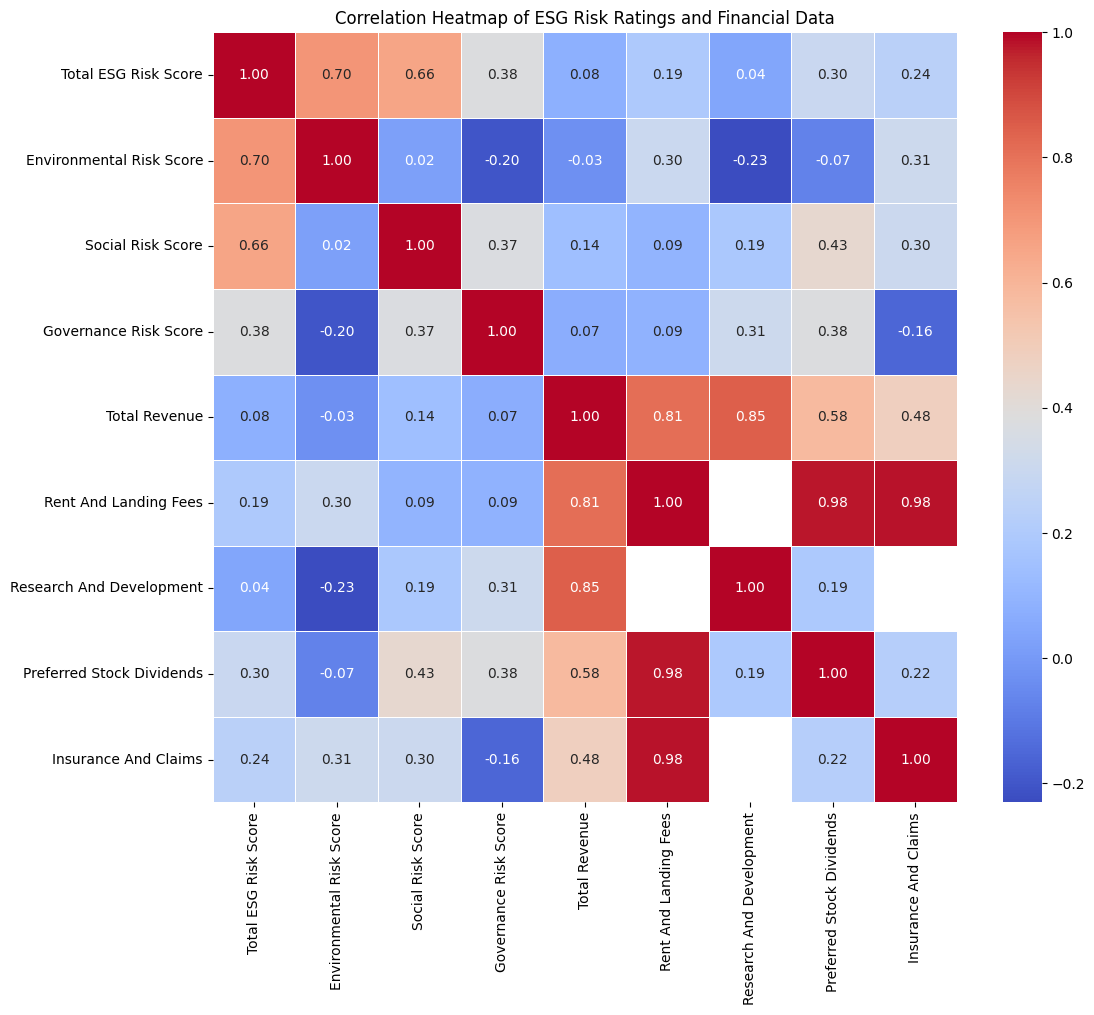

In [14]:
heatmap_data = avg_merged_data[['Total ESG Risk Score', 'Environmental Risk Score', 'Social Risk Score','Governance Risk Score','Total Revenue','Rent And Landing Fees', 'Research And Development','Preferred Stock Dividends','Insurance And Claims']]
corr = heatmap_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of ESG Risk Ratings and Financial Data')
plt.show()


Judging by the heatmap, its clear to see that ESG ratings do not have much of an effect on most financial data. However, there is a moderate correlation of .43 between "Preferred Stock Dividends" and the "Social Risk Score".

##Exploratory Data Analysis

Lets analyze this relationship further.

Text(0, 0.5, 'Social Risk Score')

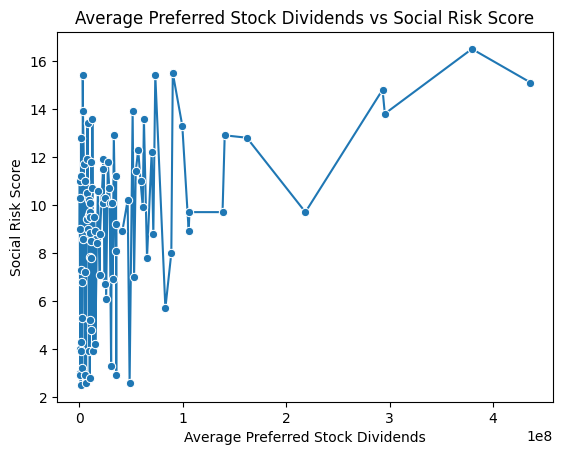

In [15]:
sns.lineplot(x='Preferred Stock Dividends', y='Social Risk Score', data=heatmap_data, marker='o')
plt.title('Average Preferred Stock Dividends vs Social Risk Score')
plt.xlabel('Average Preferred Stock Dividends')
plt.ylabel('Social Risk Score')

Judging by the linegraph, its clear to see that most of the data is inconclusive. This was easy to assume with the correlation coefficient of .43, however, there is some indication that as the "Social Risk Score" increases, the "Average Preferred Stock Dividends" increases. This may indicate that companies with higher social risk scores offer higher preferred stock dividends in order to retain investors despite the higher risk. Alternatively, it could mean that these companies are more profitable allowing them to shell out higher preferred stock dividends, which would be contradictory to the hypothesis. Referring back to the heatmap, notice that preferred stock dividends has a decent correlation with total revenue. Lets analyze this further.

Text(0, 0.5, 'Total Revenue')

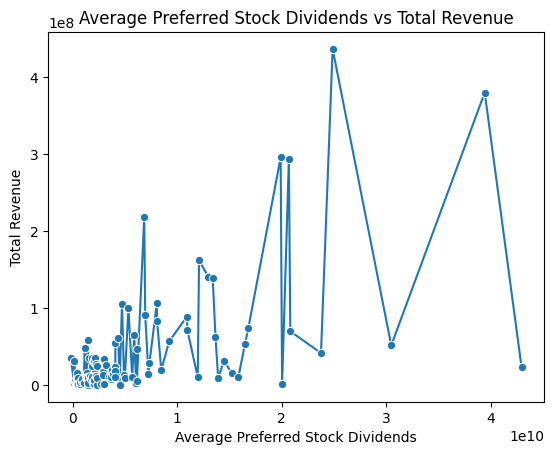

In [17]:
sns.lineplot(x='Total Revenue', y='Preferred Stock Dividends', data=heatmap_data, marker='o')
plt.title('Average Preferred Stock Dividends vs Total Revenue')
plt.xlabel('Average Preferred Stock Dividends')
plt.ylabel('Total Revenue')

After analyzing the graph, we notice the slight positive trend between "Total Revenue" and "Average Preferred Stock Dividends". This indicates that companies with higher total revenues tend to shell out more preferred stock, thus contradicting our hypothesis relating to the social risk score. Lets plot both total revenue and social risk score together over average preferred stock dividends to get a better visualization.

Text(0, 0.5, 'Social Risk Score')

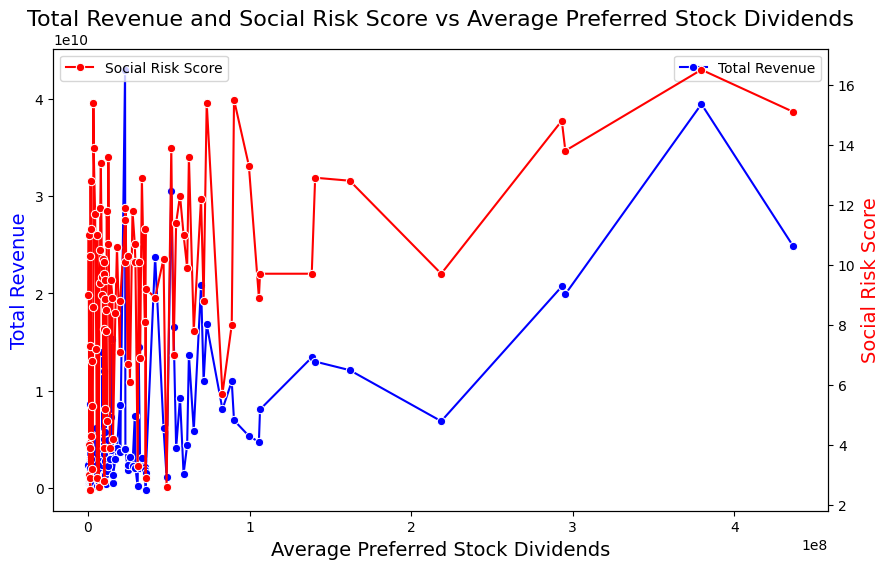

In [23]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.lineplot(x='Preferred Stock Dividends', y='Total Revenue', data=heatmap_data, ax=ax1, marker='o', color='b', label='Total Revenue')
ax2 = ax1.twinx()
sns.lineplot(x='Preferred Stock Dividends', y='Social Risk Score', data=heatmap_data, ax=ax2, marker='o', color='r', label='Social Risk Score')
ax1.set_title('Total Revenue and Social Risk Score vs Average Preferred Stock Dividends', fontsize=16)
ax1.set_xlabel('Average Preferred Stock Dividends', fontsize=14)
ax1.set_ylabel('Total Revenue', fontsize=14, color='b')
ax2.set_ylabel('Social Risk Score', fontsize=14, color='r')

As we can see in the graphed data, as social risk score and average perferred stock dividends increase, total revenue also increases. This disproves our hypothesis testing if risk scores are associated with poorer financial health and lower profitability.

##Significance

Though most of the data is inconclusive due to low correlations, the moderate correlation between "Average Preferred Stock Dividends" and "Social Risk Score" provides slight implications. By plotting 'Total Revenue' and 'Social Risk Score' against 'Average Preferred Stock Dividends', its clear to see that social risk score is associated with the inverse of our hypothesis.

##Results

In general, there is little to no relationships between risk scores and financial health. However, if there is a correlation, it is contradictory to our hypothesis as risk scores are more associated with better financial health, rather than poor financial health.